In [21]:
import numpy as np
import matplotlib.pyplot as plt

# define a set of colors for later visualizations
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

In [22]:
# This function is written by Bauckhage C. Numpy/scipy Recipes for Data Science: k-Medoids Clustering[R]. 
# Technical Report, University of Bonn, 2015.

import numpy as np
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

In [3]:

# plot dendrogram

# Authors: Mathew Kallada; revised by Yingjie Hu
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, color_the_tree = True, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    if color_the_tree:
        dendrogram(linkage_matrix, color_threshold=(len(model.labels_)-model.n_clusters), **kwargs)
    else:
        dendrogram(linkage_matrix, color_threshold=-1, **kwargs)

In [4]:
def plot_dbscan_result(model, X):  
    y_label = model.fit_predict(X)
    unique_label = set(y_label)
    n_cluster = len(unique_label)
    if -1 in unique_label:
        n_cluster = n_cluster - 1
    for cluster_i in range(n_cluster):
        plt.scatter(X[:,0][y_label== cluster_i],X[:,1][y_label== cluster_i], c=colors[cluster_i])

    # finally plot outlier
    plt.scatter(X[:,0][y_label== -1],X[:,1][y_label== -1], c="k")

In [5]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=3,random_state=42)

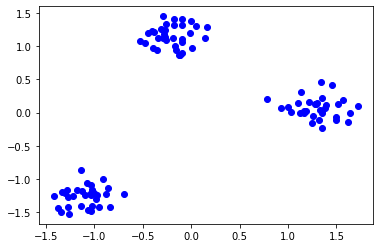

In [6]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X=std_scaler.fit_transform(X)
plt.plot(X[:,0],X[:,1],"bo")

In [7]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=3,n_init=10)
y_label = kmeans.fit_predict(X)

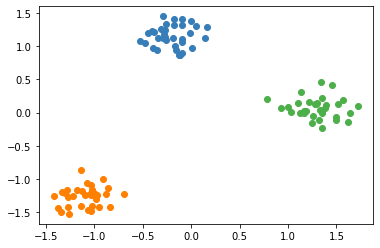

In [8]:
for cluster_i in range(kmeans.n_clusters):
    plt.plot(X[:,0][y_label == cluster_i],X[:,1][y_label==cluster_i],"o",c=colors[cluster_i])

In [9]:
def plot_cluster_result(model,X):
    y_label = model.fit_predict(X)
    
    for cluster_i in range(kmeans.n_clusters):
        plt.plot(X[:,0][y_label == cluster_i],X[:,1][y_label==cluster_i],"o",c=colors[cluster_i])

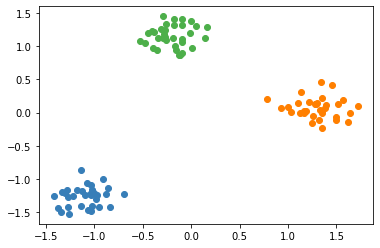

In [10]:
plot_cluster_result(kmeans,X)

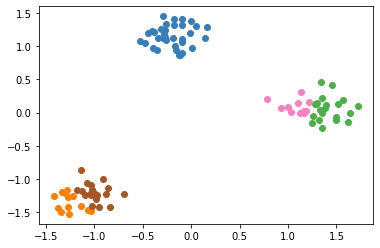

In [11]:
kmeans = KMeans(n_clusters=5,random_state=42)#n_clusters=2
plot_cluster_result(kmeans,X)

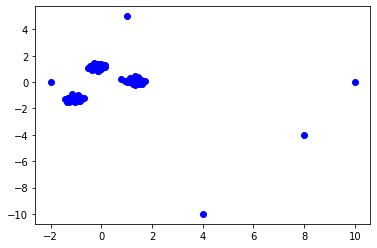

In [13]:
X_outlier =np.append(X,[[-2,0],[10,0],[1.,5],[8,-4],[4,-10]]) #outlier distort classification results
X_outlier = X_outlier.reshape(-1,2)
plt.plot(X_outlier[:,0],X_outlier[:,1],"bo")

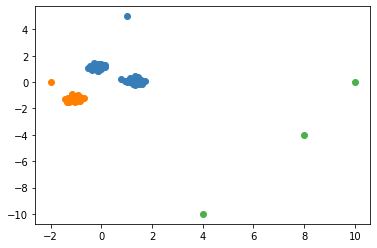

In [14]:
kmeans = KMeans(n_clusters=3,random_state=42)#n_clusters=2
plot_cluster_result(kmeans,X_outlier)

In [19]:
from sklearn.metrics.pairwise import pairwise_distances

In [24]:
D = pairwise_distances(X_outlier)
M,C = kMedoids(D,3)

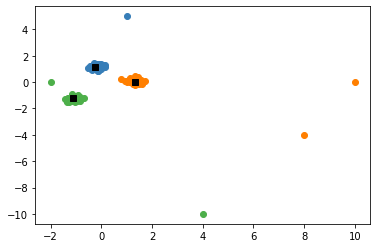

In [27]:
for cluster_i in C:
    for point_idx in C[cluster_i]:
        plt.plot(X_outlier[point_idx,0],X_outlier[point_idx,1],"o",c=colors[cluster_i])
for medoids in M:
    plt.plot(X_outlier[medoids,0],X_outlier[medoids,1],"sk")

In [26]:
C # dicionary, store the indices which belongs to each classes

{0: array([  2,   6,   9,  10,  13,  14,  17,  20,  23,  24,  25,  34,  35,
         36,  37,  41,  43,  44,  52,  56,  57,  59,  73,  80,  82,  84,
         85,  86,  88,  92,  94,  95,  96,  99, 102], dtype=int64),
 1: array([  1,   3,   5,   7,   8,  26,  31,  32,  38,  39,  42,  45,  49,
         50,  51,  58,  61,  63,  66,  68,  69,  70,  74,  76,  78,  79,
         81,  87,  89,  90,  91,  93,  97, 101, 103], dtype=int64),
 2: array([  0,   4,  11,  12,  15,  16,  18,  19,  21,  22,  27,  28,  29,
         30,  33,  40,  46,  47,  48,  53,  54,  55,  60,  62,  64,  65,
         67,  71,  72,  75,  77,  83,  98, 100, 104], dtype=int64)}

In [28]:
M

array([41, 51, 21])

In [29]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3)

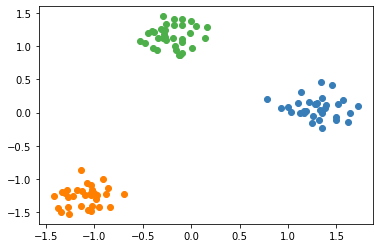

In [31]:
plot_cluster_result(agg_cluster, X)

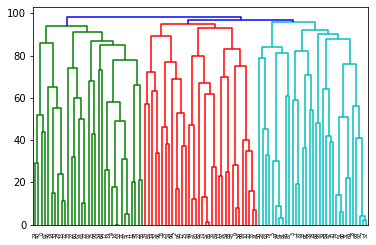

In [32]:
plot_dendrogram(agg_cluster)

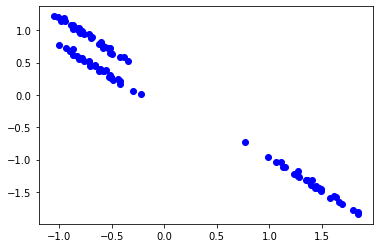

In [35]:
transformation = [[1,-1.8],[-0.4,1]]
X_aniso = np.matmul(X,transformation)
X_aniso =std_scaler.fit_transform(X_aniso)

plt.plot(X_aniso[:,0],X_aniso[:,1],"bo")

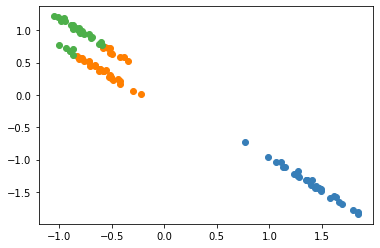

In [34]:
plot_cluster_result(kmeans,X_aniso)

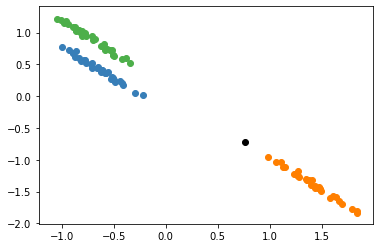

In [38]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2,min_samples=3)
plot_dbscan_result(dbscan,X_aniso)